In [30]:
%pip install --upgrade pandas
%pip install matplotlib
%pip install scikit-learn
%pip install h2o


[notice] A new release of pip is available: 23.1.2 -> 23.2
[notice] To update, run: python3.10 -m pip install --upgrade pip
Note: you may need to restart the kernel to use updated packages.

[notice] A new release of pip is available: 23.1.2 -> 23.2
[notice] To update, run: python3.10 -m pip install --upgrade pip
Note: you may need to restart the kernel to use updated packages.

[notice] A new release of pip is available: 23.1.2 -> 23.2
[notice] To update, run: python3.10 -m pip install --upgrade pip
Note: you may need to restart the kernel to use updated packages.

[notice] A new release of pip is available: 23.1.2 -> 23.2
[notice] To update, run: python3.10 -m pip install --upgrade pip
Note: you may need to restart the kernel to use updated packages.


In [31]:
import pandas as pd
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt
from sklearn.neural_network import MLPClassifier
from sklearn.metrics import confusion_matrix
from sklearn.metrics import mean_squared_error
from math import sqrt
import numpy as np
from sklearn.model_selection import train_test_split

In [32]:
print(pd.__version__)

2.0.3


In [33]:
df = pd.read_csv("../TestBalanceo1.csv", sep=";;;", index_col=False)
# df.head()
y_col_name = "has_complaint"
df_banderas_completo = pd.read_csv('../OcidConBanderas.csv', sep=";", index_col=False)
df_banderas_completo.drop(['Unnamed: 10'], inplace=True, axis=1)
df_completo = df.merge(df_banderas_completo, left_on='ocid', right_on='id', how='left')
df_completo.head()

/var/folders/0s/ngx4k9892vv59rf4q5h1h4w00000gn/T/ipykernel_1140/3404743759.py:1: ParserWarning: Falling back to the 'python' engine because the 'c' engine does not support regex separators (separators > 1 char and different from '\s+' are interpreted as regex); you can avoid this warning by specifying engine='python'.
  df = pd.read_csv("../TestBalanceo1.csv", sep=";;;", index_col=False)


,ocid,id_x,tender.id,tender.title,tender.status,tender.awardCriteria,tender.awardCriteriaDetails,tender.bidOpening.date,tender.bidOpening.address.streetAddress,tender.submissionMethodDetails,...,id_y,Oferente Unico,Tiempo de Convocatoria CO,Proveedores Notificados CO,Criterio de evaluacion faltante,Monto faltante,Enmiendas del contrato,Protestas,Preguntas Sin Respuesta,Tiempo de convocatoria LPN
0,ocds-03ad3f-337459-1,337459-construccion-empedrados-calle-ex-combat...,337459-construccion-empedrados-calle-ex-combat...,"""Construcción de Empedrados: Calle Ex Combatie...",complete,priceOnly,Por Total,2017-11-14T08:30:00-04:00,UOC DE LA MUNICIPALIDAD DE CAPIATA,Lugar entrega ofertas: MESA DE ENTRADA UOC DE ...,...,ocds-03ad3f-337459-1,True,False,False,False,False,False,False,False,False
1,ocds-03ad3f-391650-1,391650-construccion-pavimento-tipo-empedrado-c...,391650-construccion-pavimento-tipo-empedrado-c...,"""Construcción de Pavimento Tipo Empedrado, Cor...",complete,priceOnly,Por Total,2021-03-05T10:15:00-04:00,Municipalidad de Atyrá,Lugar entrega ofertas: Municipalidad de Atyrá ...,...,ocds-03ad3f-391650-1,False,False,False,False,False,False,False,False,False
2,ocds-03ad3f-342425-1,342425-1519898255,planned,"""None""",planning,NaN,NaN,NaN,NaN,NaN,...,ocds-03ad3f-342425-1,False,False,False,True,False,False,False,False,False
3,ocds-03ad3f-390367-1,390367-adquisicion-combustible-1-1622205666,390367-adquisicion-combustible-1,"""ADQUISICIÒN DE COMBUSTIBLE""",complete,priceOnly,Por Total,2021-03-29T08:15:00-04:00,Municipalidad de Primero de Marzo,Lugar entrega ofertas: Municipalidad de Primer...,...,ocds-03ad3f-390367-1,True,False,False,False,False,False,False,False,False
4,ocds-03ad3f-343112-1,343112-adquisicion-kit-racion-combate-yerba-ma...,343112-adquisicion-kit-racion-combate-yerba-ma...,"""ADQUISICION DE KIT DE RACION DE COMBATE Y YER...",complete,priceOnly,Por Item,2018-03-16T09:15:00-04:00,Stella Marys c/ Hernandarias - Edificio de la ...,Lugar entrega ofertas: Stella Marys c/ Hernand...,...,ocds-03ad3f-343112-1,False,False,False,False,False,False,False,False,False


transformamos y quitamos los valores de más

In [34]:
#Drop
df_dummizado = df_completo.drop(['ocid', 'id_x', 'id_y', 'tender.id', # Dropeamos por que son IDs
    'tender.bidOpening.address.streetAddress', 'tender.enquiriesAddress.streetAddress', #Dropeamos por que son direcciones, creemos que no tienen valor
    'ocid.1', 'tender.procurementIntention.uri', # URL y id
    'tender.procurementIntention.description', #Descripcion
    'tender.procurementIntention.category', # Dropeamos porque ya esta la info en otra columna
    'tender.procurementIntention.title', #Titulo, practicamente todos son unicos
    'initiationType', #Todos tienen el mismo valor (tender)
    'tender.procurementIntention.id', # Ver vien por que dropeamos
    'tag', #Todos tienen el mismo valor (compiled)
    'language', #Todos tienen el mismo valor (es)
    'tender.techniques.hasFrameworkAgreement', #Solo 48 rows con datos, no vale la pena
    'Protestas', #Tiene info del resultado
	'tender.contractPeriod.durationInDays',
	# 'has_complaint', # se debe elegir quitar este o protestas, son la columna objetivo
], axis=1)

#Dummies
df_dummizado = pd.get_dummies(df_dummizado, columns=['tender.status']) # Cardinalidad baja
df_dummizado = pd.get_dummies(df_dummizado, columns=['tender.awardCriteria']) # Cardinalidad baja
df_dummizado = pd.get_dummies(df_dummizado, columns=['tender.awardCriteriaDetails']) # Cardinalidad baja
df_dummizado = pd.get_dummies(df_dummizado, columns=['tender.statusDetails']) # Cardinalidad baja
df_dummizado = pd.get_dummies(df_dummizado, columns=['tender.hasEnquiries']) # Cardinalidad baja
df_dummizado = pd.get_dummies(df_dummizado, columns=['tender.value.currency']) # Cardinalidad baja
df_dummizado = pd.get_dummies(df_dummizado, columns=['tender.mainProcurementCategory']) # Cardinalidad baja
df_dummizado = pd.get_dummies(df_dummizado, columns=['tender.procurementMethod']) # Cardinalidad baja
df_dummizado = pd.get_dummies(df_dummizado, columns=['tender.procurementMethodRationale']) # Cardinalidad baja
df_dummizado = pd.get_dummies(df_dummizado, columns=['tender.procurementIntention.rationale']) # Cardinalidad baja
df_dummizado = pd.get_dummies(df_dummizado, columns=['planning.budget.amount.currency']) # Cardinalidad baja

df_dummizado = pd.get_dummies(df_dummizado, columns=['tender.procurementIntention.status']) # Cardinalidad baja
df_dummizado = pd.get_dummies(df_dummizado, columns=['tender.procurementIntention.statusDetails']) # Cardinalidad baja


#Dates
df_dummizado['tender.bidOpening.date.month'] = pd.to_datetime(df_dummizado['tender.bidOpening.date'], format='%Y-%m-%dT%H:%M:%S-04:00').dt.month
df_dummizado['tender.bidOpening.date.year'] = pd.to_datetime(df_dummizado['tender.bidOpening.date'], format='%Y-%m-%dT%H:%M:%S-04:00').dt.year
df_dummizado['tender.bidOpening.date.yearmonth'] = pd.to_datetime(df_dummizado['tender.bidOpening.date'], format='%Y-%m-%dT%H:%M:%S-04:00').dt.strftime('%Y%m')

df_dummizado['tender.datePublished.month'] = pd.to_datetime(df_dummizado['tender.datePublished'], format='%Y-%m-%dT%H:%M:%S-04:00').dt.month
df_dummizado['tender.datePublished.year'] = pd.to_datetime(df_dummizado['tender.datePublished'], format='%Y-%m-%dT%H:%M:%S-04:00').dt.year
df_dummizado['tender.datePublished.yearmonth'] = pd.to_datetime(df_dummizado['tender.datePublished'], format='%Y-%m-%dT%H:%M:%S-04:00').dt.strftime('%Y%m')

df_dummizado['tender.tenderPeriod.startDate.month'] = pd.to_datetime(df_dummizado['tender.tenderPeriod.startDate'], format='%Y-%m-%dT%H:%M:%S-04:00').dt.month
df_dummizado['tender.tenderPeriod.startDate.year'] = pd.to_datetime(df_dummizado['tender.tenderPeriod.startDate'], format='%Y-%m-%dT%H:%M:%S-04:00').dt.year
df_dummizado['tender.tenderPeriod.startDate.yearmonth'] = pd.to_datetime(df_dummizado['tender.tenderPeriod.startDate'], format='%Y-%m-%dT%H:%M:%S-04:00').dt.strftime('%Y%m')

df_dummizado['tender.tenderPeriod.endDate.month'] = pd.to_datetime(df_dummizado['tender.tenderPeriod.startDate'], format='%Y-%m-%dT%H:%M:%S-04:00').dt.month
df_dummizado['tender.tenderPeriod.endDate.year'] = pd.to_datetime(df_dummizado['tender.tenderPeriod.startDate'], format='%Y-%m-%dT%H:%M:%S-04:00').dt.year
df_dummizado['tender.tenderPeriod.endDate.yearmonth'] = pd.to_datetime(df_dummizado['tender.tenderPeriod.startDate'], format='%Y-%m-%dT%H:%M:%S-04:00').dt.strftime('%Y%m')

df_dummizado['tender.awardPeriod.startDate.month'] = pd.to_datetime(df_dummizado['tender.awardPeriod.startDate'], format='%Y-%m-%dT%H:%M:%S-04:00').dt.month
df_dummizado['tender.awardPeriod.startDate.year'] = pd.to_datetime(df_dummizado['tender.awardPeriod.startDate'], format='%Y-%m-%dT%H:%M:%S-04:00').dt.year
df_dummizado['tender.awardPeriod.startDate.yearmonth'] = pd.to_datetime(df_dummizado['tender.awardPeriod.startDate'], format='%Y-%m-%dT%H:%M:%S-04:00').dt.strftime('%Y%m')

df_dummizado['tender.enquiryPeriod.endDate.month'] = pd.to_datetime(df_dummizado['tender.enquiryPeriod.endDate'], format='%Y-%m-%dT%H:%M:%S-04:00').dt.month
df_dummizado['tender.enquiryPeriod.endDate.year'] = pd.to_datetime(df_dummizado['tender.enquiryPeriod.endDate'], format='%Y-%m-%dT%H:%M:%S-04:00').dt.year
df_dummizado['tender.enquiryPeriod.endDate.yearmonth'] = pd.to_datetime(df_dummizado['tender.enquiryPeriod.endDate'], format='%Y-%m-%dT%H:%M:%S-04:00').dt.strftime('%Y%m')

df_dummizado['tender.enquiryPeriod.startDate.month'] = pd.to_datetime(df_dummizado['tender.enquiryPeriod.startDate'], format='%Y-%m-%dT%H:%M:%S-04:00').dt.month
df_dummizado['tender.enquiryPeriod.startDate.year'] = pd.to_datetime(df_dummizado['tender.enquiryPeriod.startDate'], format='%Y-%m-%dT%H:%M:%S-04:00').dt.year
df_dummizado['tender.enquiryPeriod.startDate.yearmonth'] = pd.to_datetime(df_dummizado['tender.enquiryPeriod.startDate'], format='%Y-%m-%dT%H:%M:%S-04:00').dt.strftime('%Y%m')

df_dummizado['date.month'] = pd.to_datetime(df_dummizado['date'], format='%Y-%m-%dT%H:%M:%S-04:00').dt.month
df_dummizado['date.year'] = pd.to_datetime(df_dummizado['date'], format='%Y-%m-%dT%H:%M:%S-04:00').dt.year
df_dummizado['date.yearmonth'] = pd.to_datetime(df_dummizado['date'], format='%Y-%m-%dT%H:%M:%S-04:00').dt.strftime('%Y%m')

df_dummizado['planning.estimatedDate.month'] = pd.to_datetime(df_dummizado['planning.estimatedDate'], format='%Y-%m-%dT%H:%M:%S-04:00').dt.month
df_dummizado['planning.estimatedDate.year'] = pd.to_datetime(df_dummizado['planning.estimatedDate'], format='%Y-%m-%dT%H:%M:%S-04:00').dt.year
df_dummizado['planning.estimatedDate.yearmonth'] = pd.to_datetime(df_dummizado['planning.estimatedDate'], format='%Y-%m-%dT%H:%M:%S-04:00').dt.strftime('%Y%m')
# Dropeando data interesante (Despues ver como procesar, son datos practicamente unicos)
df_dummizado = df_dummizado.drop(['tender.title', 'tender.submissionMethodDetails', 'tender.eligibilityCriteria', 'tender.mainProcurementCategoryDetails', 'planning.budget.description', ], axis=1)

# Dropeando por cardinalidad alta? Datos no 100% unicos por cada row
df_dummizado = df_dummizado.drop(['tender.procurementMethodDetails', 'tender.procuringEntity.id', 'tender.procuringEntity.name', 'buyer.id', 'buyer.name', 
	'tender.procurementIntention.procuringEntity.id', 'tender.procurementIntention.procuringEntity.name', 'secondStage.id',
], axis=1)

#Dropeando dates
df_dummizado = df_dummizado.drop(['tender.bidOpening.date',
	'tender.datePublished', 'tender.tenderPeriod.startDate', 'tender.tenderPeriod.endDate', 'tender.awardPeriod.startDate','tender.enquiryPeriod.endDate','tender.enquiryPeriod.startDate',
    'date', 'planning.estimatedDate', 
    'tender.contractPeriod.maxExtentDate', # Hay solo 7000
    'tender.procurementIntention.startDate', 'tender.procurementIntention.publishedDate', #Hay solo 1200 en todo el dataset
	'tender.contractPeriod.startDate', 'tender.contractPeriod.endDate' # Hay solo 35 datos en todo el dataset
], axis= 1)

# Otras conversiones
df_dummizado['tender.techniques.hasElectronicAuction'] = np.where(df_dummizado['tender.techniques.hasElectronicAuction'] == True, 1, 0)
# llenamos los campos null
df_dummizado['tender.bidOpening.date.month'].fillna(0, inplace=True)
df_dummizado['tender.bidOpening.date.year'].fillna(0, inplace=True)
df_dummizado['tender.bidOpening.date.yearmonth'].fillna(0, inplace=True)

df_dummizado['tender.enquiryPeriod.endDate.month'].fillna(0, inplace=True)
df_dummizado['tender.enquiryPeriod.endDate.year'].fillna(0, inplace=True)
df_dummizado['tender.enquiryPeriod.endDate.yearmonth'].fillna(0, inplace=True)
df_dummizado['tender.enquiryPeriod.startDate.month'].fillna(0, inplace=True)
df_dummizado['tender.enquiryPeriod.startDate.year'].fillna(0, inplace=True)
df_dummizado['tender.enquiryPeriod.startDate.yearmonth'].fillna(0, inplace=True)
df_dummizado['tender.tenderPeriod.startDate.month'].fillna(0, inplace=True)
df_dummizado['tender.tenderPeriod.startDate.year'].fillna(0, inplace=True)
df_dummizado['tender.tenderPeriod.startDate.yearmonth'].fillna(0, inplace=True)
df_dummizado['tender.tenderPeriod.endDate.month'].fillna(0, inplace=True)
df_dummizado['tender.tenderPeriod.endDate.year'].fillna(0, inplace=True)
df_dummizado['tender.tenderPeriod.endDate.yearmonth'].fillna(0, inplace=True)
df_dummizado['tender.awardPeriod.startDate.month'].fillna(0, inplace=True)
df_dummizado['tender.awardPeriod.startDate.year'].fillna(0, inplace=True)
df_dummizado['tender.awardPeriod.startDate.yearmonth'].fillna(0, inplace=True)
df_dummizado['tender.datePublished.month'].fillna(0, inplace=True)
df_dummizado['tender.datePublished.year'].fillna(0, inplace=True)
df_dummizado['tender.datePublished.yearmonth'].fillna(0, inplace=True)
df_dummizado['planning.estimatedDate.month'].fillna(0, inplace=True)
df_dummizado['planning.estimatedDate.year'].fillna(0, inplace=True)
df_dummizado['planning.estimatedDate.yearmonth'].fillna(0, inplace=True)
df_dummizado['planning.identifier'] = df_dummizado['planning.identifier'].fillna(0)

# Drop if col NaN = 
df_dummizado = df_dummizado[df_dummizado['tender.value.amount'].notna()]

df_dummizado['tender.value.amount'].fillna(df_dummizado['tender.value.amount'].mean(), inplace=True)

# Tender duration y enquiry period dependen también del procurement method, para cada procurement method por ley hay unos mínimos, sugiero usar eso los mínimos. Investiguen esto si. 
df_dummizado['tender.tenderPeriod.durationInDays'].fillna(df_dummizado['tender.tenderPeriod.durationInDays'].mean(), inplace=True)
df_dummizado['tender.enquiryPeriod.durationInDays'].fillna(df_dummizado['tender.enquiryPeriod.durationInDays'].mean(), inplace=True)

df_dummizado['tender.numberOfTenderers'].fillna(1, inplace=True)
df_dummizado['planning.budget.amount.amount'].fillna(df_dummizado['planning.budget.amount.amount'].mean(), inplace=True)
df_dummizado['tender.techniques.hasElectronicAuction'] = df_dummizado['tender.techniques.hasElectronicAuction'].fillna(False)

# Nuevas columnas para redflags
df_dummizado['redflags.amount.raised'] = df_dummizado[['Oferente Unico', 'Tiempo de Convocatoria CO',
       'Proveedores Notificados CO', 'Criterio de evaluacion faltante',
       'Monto faltante', 'Enmiendas  del contrato',
       'Preguntas Sin Respuesta', 'Tiempo de convocatoria LPN']].astype(int).sum(axis=1)
df_dummizado['hasRedflags'] = df_dummizado[['Oferente Unico', 'Tiempo de Convocatoria CO',
       'Proveedores Notificados CO', 'Criterio de evaluacion faltante',
       'Monto faltante', 'Enmiendas  del contrato',
       'Preguntas Sin Respuesta', 'Tiempo de convocatoria LPN']].any(axis=1)

In [35]:
df_dummizado[['Oferente Unico', 'Tiempo de Convocatoria CO',
       'Proveedores Notificados CO', 'Criterio de evaluacion faltante',
       'Monto faltante', 'Enmiendas  del contrato',
       'Preguntas Sin Respuesta', 'Tiempo de convocatoria LPN']]

,Oferente Unico,Tiempo de Convocatoria CO,Proveedores Notificados CO,Criterio de evaluacion faltante,Monto faltante,Enmiendas del contrato,Preguntas Sin Respuesta,Tiempo de convocatoria LPN
0,True,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False
3,True,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False
5,True,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...
97253,False,False,False,False,False,False,False,False
97254,False,False,False,False,False,False,True,False
97256,False,False,False,False,False,False,False,False
97258,False,False,False,False,False,False,False,False


# PCA

In [36]:
train, test = train_test_split(df_dummizado, test_size=0.2, random_state=42)
train_x = train.drop(y_col_name, axis=1)  # Features (all columns except 'target')
y = train[y_col_name]  # Target variable
train_x.head()
y.head()

25681    False
6800     False
19284    False
85735    False
22367    False
Name: has_complaint, dtype: bool

In [37]:
pca = PCA(n_components=0.98, svd_solver='full')
x_pca = pca.fit_transform(train_x)
test_x = pca.transform(test.drop(y_col_name, axis=1))
print(train_x.shape)
print(x_pca.shape)
print(x_pca)

(58041, 902)
(58041, 3)
[[-7.84877092e+09  1.54770217e+08  5.86829982e+06]
 [-8.00926169e+09  1.52666473e+08  5.75537994e+06]
 [-5.27562254e+09  1.40054195e+09 -3.57197577e+09]
 ...
 [-8.03804366e+09  3.06927862e+08 -2.45217884e+07]
 [-7.91229863e+09  1.39521517e+08  9.98248530e+06]
 [ 5.58100753e+10 -6.28251012e+09 -1.21982058e+09]]


In [38]:
model = MLPClassifier(hidden_layer_sizes=(50), max_iter=3000, activation='relu', solver='adam', random_state=1)
model.fit(x_pca, y)

y_pred = model.predict(test_x)
y_pred[y_pred<0] = 0

In [39]:
# test[y_col_name] = test[y_col_name].astype(int)
print(test[y_col_name])

17532    False
1743      True
43300     True
54182    False
90604    False
         ...  
87302    False
55275    False
95696     True
87029    False
26689    False
Name: has_complaint, Length: 14511, dtype: bool


In [40]:
print(y_pred)

[False False False ... False False False]


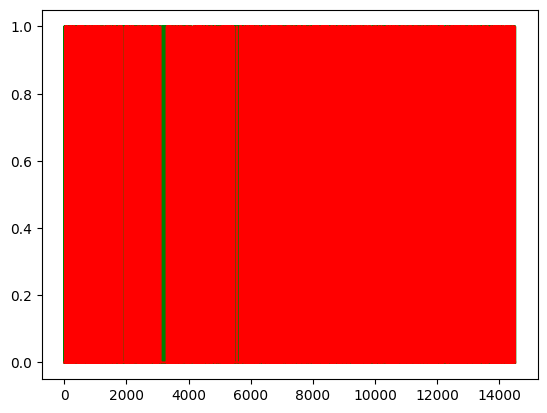

In [41]:
tam = test.shape[0]
x_range = range(tam)  # Generar un rango de valores desde 0 hasta tam-1

plt.plot(x_range, test[y_col_name], color='green')
plt.plot(x_range, y_pred, color='red')
plt.show()


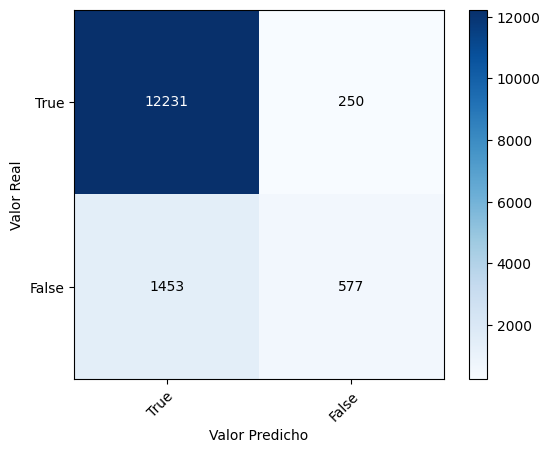

In [13]:
# Calcular la matriz de confusión
cm = confusion_matrix(test[y_col_name], y_pred)

# Definir las etiquetas de las clases
class_labels = ['True', 'False']

# Crear el gráfico de la matriz de confusión
fig, ax = plt.subplots()
im = ax.imshow(cm, interpolation='nearest', cmap=plt.cm.Blues)
ax.figure.colorbar(im, ax=ax)

# Etiquetas de los ejes
ax.set(xticks=np.arange(cm.shape[1]),
       yticks=np.arange(cm.shape[0]),
       xticklabels=class_labels, yticklabels=class_labels,
       xlabel='Valor Predicho', ylabel='Valor Real')

# Rotar y alinear correctamente las etiquetas de los ejes
plt.setp(ax.get_xticklabels(), rotation=45, ha="right",
         rotation_mode="anchor")

# Anotar los valores de la matriz de confusión en cada celda
for i in range(cm.shape[0]):
    for j in range(cm.shape[1]):
        ax.text(j, i, format(cm[i, j], 'd'),
                ha="center", va="center",
                color="white" if cm[i, j] > cm.max() / 2. else "black")

# Mostrar el gráfico
plt.show()


# Correlación de Pearson

Correlación lineal de las columnas

In [74]:
corMatrix = df_dummizado.corr()
corMatrix[(abs(corMatrix) > 0.25) & (corMatrix < 1)][y_col_name].dropna()

tender.enquiryPeriod.durationInDays                 0.312302
tender.numberOfTenderers                            0.312436
tender.tenderers.id q2                              0.292768
tender.tenderers.id q3                              0.265911
tender.enquiries porcentaje                         0.279866
tender.documents.documentTypeDetails_1              0.357891
tender.documents.documentTypeDetails_2              0.332325
tender.documents.documentTypeDetails_12             0.261852
parties.details.legalEntityTypeDetail enquirer_3    0.265047
parties.details.legalEntityTypeDetail supplier_3    0.257693
parties.details.legalEntityTypeDetail tenderer_3    0.332734
parties.roles tenderer q2                           0.293401
parties.roles tenderer q3                           0.263571
tender.procurementMethodDetails q1                 -0.320592
tender.procurementMethodDetails q4                  0.366967
Tiempo de convocatoria LPN                          0.275805
tender.hasEnquiries_Fals

In [15]:
corMatrix = df_dummizado.corr()
corMatrix['tender.value.amount'][y_col_name]

0.21756707738480727

In [16]:
corMatrix_kendall = df_dummizado.corr(method='kendall')
corMatrix_kendall[(abs(corMatrix_kendall) > 0.25) & (corMatrix_kendall < 1)][y_col_name].dropna()

tender.value.amount                                 0.307940
tender.enquiryPeriod.durationInDays                 0.251260
planning.budget.amount.amount                       0.302532
tender.enquiries.count                              0.286539
awards.value.amount_pyg                             0.251090
tender.enquiries total                              0.286539
tender.enquiries respondidos                        0.290876
tender.enquiries porcentaje                         0.280221
tender.documents.documentTypeDetails_3             -0.251039
tender.documents.documentTypeDetails_12             0.271575
parties.details.legalEntityTypeDetail enquirer_3    0.271747
tender.procurementMethodDetails q1                 -0.320592
tender.procurementMethodDetails q4                  0.366967
Tiempo de convocatoria LPN                          0.275805
tender.hasEnquiries_False                          -0.270946
tender.hasEnquiries_True                            0.270946
Name: has_complaint, dty

In [17]:
corMatrix_spearman = df_dummizado.corr(method='spearman')
corMatrix_spearman[(abs(corMatrix_spearman) > 0.25) & (corMatrix_spearman < 1)][y_col_name].dropna()

tender.value.amount                                 0.376934
tender.enquiryPeriod.durationInDays                 0.299007
planning.budget.amount.amount                       0.369644
tender.enquiries.count                              0.297892
contracts.value.amount_pyg                          0.261290
awards.value.amount_pyg                             0.304501
tender.enquiries total                              0.297892
tender.enquiries respondidos                        0.301921
tender.enquiries porcentaje                         0.280463
tender.documents.documentTypeDetails_1              0.263705
tender.documents.documentTypeDetails_3             -0.257903
tender.documents.documentTypeDetails_12             0.272815
parties.details.legalEntityTypeDetail enquirer_3    0.274140
parties.details.legalEntityTypeDetail tenderer_3    0.257444
tender.procurementMethodDetails q1                 -0.320592
tender.procurementMethodDetails q4                  0.366967
Tiempo de convocatoria L

# Comparativas con H2o

In [18]:
import h2o
from h2o.automl import H2OAutoML

# Start the H2O cluster (locally)
h2o.init()

Checking whether there is an H2O instance running at http://localhost:54321..... not found.
Attempting to start a local H2O server...
  Java Version: openjdk version "20.0.1" 2023-04-18; OpenJDK Runtime Environment Homebrew (build 20.0.1); OpenJDK 64-Bit Server VM Homebrew (build 20.0.1, mixed mode, sharing)
  Starting server from /usr/local/lib/python3.10/site-packages/h2o/backend/bin/h2o.jar
  Ice root: /var/folders/0s/ngx4k9892vv59rf4q5h1h4w00000gn/T/tmps7gxtj62
  JVM stdout: /var/folders/0s/ngx4k9892vv59rf4q5h1h4w00000gn/T/tmps7gxtj62/h2o_matiaslopez_started_from_python.out
  JVM stderr: /var/folders/0s/ngx4k9892vv59rf4q5h1h4w00000gn/T/tmps7gxtj62/h2o_matiaslopez_started_from_python.err
  Server is running at http://127.0.0.1:54321
Connecting to H2O server at http://127.0.0.1:54321 ... successful.


H2O_cluster_uptime:,03 secs
H2O_cluster_timezone:,America/Asuncion
H2O_data_parsing_timezone:,UTC
H2O_cluster_version:,3.42.0.1
H2O_cluster_version_age:,"28 days, 17 hours and 43 minutes"
H2O_cluster_name:,H2O_from_python_matiaslopez_ylewk6
H2O_cluster_total_nodes:,1
H2O_cluster_free_memory:,15.98 Gb
H2O_cluster_total_cores:,12
H2O_cluster_allowed_cores:,12
H2O_cluster_status:,"locked, healthy"


### Primero para PCA:

In [56]:
# pca_train = pd.concat([pd.DataFrame(x_pca), y.reset_index(drop=True).astype(int)], axis=1) # version regressor
pca_train = pd.concat([pd.DataFrame(x_pca), y.reset_index(drop=True)], axis=1) # version classifier
pca_train

,0,1,2,has_complaint
0,-7.848771e+09,1.547702e+08,5.868300e+06,False
1,-8.009262e+09,1.526665e+08,5.755380e+06,False
2,-5.275623e+09,1.400542e+09,-3.571976e+09,False
3,-7.087245e+09,-1.139085e+07,5.563663e+07,False
4,-8.118145e+09,1.723834e+08,-2.040763e+06,False
...,...,...,...,...
58036,-8.048831e+09,1.652832e+08,9.738946e+06,False
58037,-8.056777e+09,1.619184e+08,3.029643e+06,False
58038,-8.038044e+09,3.069279e+08,-2.452179e+07,True
58039,-7.912299e+09,1.395215e+08,9.982485e+06,False


In [65]:
# pca_test = pd.concat([pd.DataFrame(test_x), test[y_col_name].reset_index(drop=True).astype(int)], axis=1)
pca_test = pd.concat([pd.DataFrame(test_x), test[y_col_name].reset_index(drop=True)], axis=1)
print(pca_test)

                  0             1             2  has_complaint
0     -8.039324e+09  3.060564e+08 -2.437942e+07          False
1     -3.260510e+09 -6.892566e+08  2.622386e+08           True
2     -7.917984e+09  1.357981e+08  1.081733e+07           True
3     -7.385633e+09  1.336230e+08 -1.500137e+08          False
4     -7.623207e+09  8.357946e+07  2.673007e+07          False
...             ...           ...           ...            ...
14506 -3.889368e+09 -5.778568e+08  2.282915e+08          False
14507 -8.099827e+09  2.042758e+08 -5.177849e+06          False
14508 -7.884891e+09  1.325203e+08  1.196786e+07           True
14509 -7.921759e+09  3.860699e+08 -3.745114e+07          False
14510 -8.173458e+09  1.810543e+08 -2.973714e+06          False

[14511 rows x 4 columns]


In [66]:
train_h2o_pca = h2o.H2OFrame.from_python(pca_train)
test_h2o_pca = h2o.H2OFrame.from_python(pca_test)
#list(y.astype(int))

Parse progress: |████████████████████████████████████████████████████████████████| (done) 100%
Parse progress: |████████████████████████████████████████████████████████████████| (done) 100%


In [59]:
# Run AutoML for 20 base models
aml = H2OAutoML(max_models=25, seed=1)
aml.train(x=train_h2o_pca.columns, y=y_col_name, training_frame=train_h2o_pca)
# View the AutoML Leader
# board
lb = aml.leaderboard
lb.head(rows=lb.nrows)  # Print all rows instead of default (10 rows)

AutoML progress: |███████████████████████████████████████████████████████████████| (done) 100%


model_id,auc,logloss,aucpr,mean_per_class_error,rmse,mse
StackedEnsemble_AllModels_1_AutoML_2_20230719_212050,0.845664,0.286055,0.601091,0.250825,0.288117,0.0830116
StackedEnsemble_BestOfFamily_1_AutoML_2_20230719_212050,0.844552,0.286962,0.599525,0.250688,0.288588,0.0832828
XGBoost_grid_1_AutoML_2_20230719_212050_model_2,0.840561,0.290783,0.587878,0.256533,0.290298,0.0842731
XGBoost_grid_1_AutoML_2_20230719_212050_model_4,0.838703,0.294085,0.573762,0.266232,0.29293,0.0858081
DRF_1_AutoML_2_20230719_212050,0.838653,0.294893,0.590909,0.258373,0.29166,0.0850657
XGBoost_grid_1_AutoML_2_20230719_212050_model_3,0.834384,0.297753,0.561684,0.265775,0.295369,0.0872431
XGBoost_grid_1_AutoML_2_20230719_212050_model_1,0.833978,0.297431,0.564942,0.263348,0.294597,0.0867876
XGBoost_2_AutoML_2_20230719_212050,0.833119,0.297801,0.565484,0.26145,0.29476,0.0868837
XGBoost_grid_1_AutoML_2_20230719_212050_model_5,0.833097,0.298206,0.563302,0.2644,0.29499,0.0870192
XGBoost_1_AutoML_2_20230719_212050,0.832597,0.29799,0.565884,0.262226,0.294492,0.0867257


In [60]:
aml.leader

key,value
Stacking strategy,cross_validation
Number of base models (used / total),4/25
# GBM base models (used / total),1/9
# XGBoost base models (used / total),2/8
# DRF base models (used / total),1/2
# DeepLearning base models (used / total),0/5
# GLM base models (used / total),0/1
Metalearner algorithm,GLM
Metalearner fold assignment scheme,Random
Metalearner nfolds,5


In [67]:
preds = aml.predict(test_h2o_pca)

stackedensemble prediction progress: |███████████████████████████████████████████| (done) 100%


In [68]:
preds['predict'] == 'True'
preds_True = preds[(preds['predict'] == 'True')]
preds_True.head(50)

predict,False,True
True,0.501876,0.498124
True,0.489041,0.510959
True,0.670389,0.329611
True,0.206687,0.793313
True,0.203461,0.796539
True,0.337096,0.662904
True,0.489259,0.510741
True,0.610144,0.389856
True,0.150689,0.849311
True,0.187607,0.812393


# Leaderboard

> Leaderboard shows models with their metrics. When provided with H2OAutoML object, the leaderboard shows 5-fold cross-validated metrics by default (depending on the H2OAutoML settings), otherwise it shows metrics computed on the frame. At most 20 models are shown by default.

model_id,auc,logloss,aucpr,mean_per_class_error,rmse,mse,training_time_ms,predict_time_per_row_ms,algo
StackedEnsemble_AllModels_1_AutoML_2_20230719_212050,0.846348,0.284805,0.597285,0.248348,0.287578,0.0827011,10330,0.009062,StackedEnsemble
StackedEnsemble_BestOfFamily_1_AutoML_2_20230719_212050,0.844588,0.285991,0.595074,0.254744,0.288184,0.0830499,9074,0.00562,StackedEnsemble
XGBoost_grid_1_AutoML_2_20230719_212050_model_2,0.840214,0.289542,0.582601,0.252766,0.289646,0.083895,1880,0.005148,XGBoost
DRF_1_AutoML_2_20230719_212050,0.839308,0.293891,0.58603,0.254983,0.291638,0.0850529,1366,0.005014,DRF
XGBoost_grid_1_AutoML_2_20230719_212050_model_4,0.837175,0.293543,0.567214,0.258092,0.292023,0.0852772,1610,0.002967,XGBoost
XGBoost_2_AutoML_2_20230719_212050,0.834167,0.295856,0.560238,0.258709,0.29354,0.0861656,1023,0.003048,XGBoost
XRT_1_AutoML_2_20230719_212050,0.832721,0.303807,0.565113,0.26585,0.295452,0.0872916,902,0.00341,DRF
XGBoost_1_AutoML_2_20230719_212050,0.83266,0.29651,0.561456,0.269382,0.293505,0.0861451,1391,0.003941,XGBoost
XGBoost_grid_1_AutoML_2_20230719_212050_model_5,0.832504,0.29715,0.557312,0.267003,0.293993,0.086432,3937,0.004607,XGBoost
XGBoost_grid_1_AutoML_2_20230719_212050_model_3,0.831867,0.298733,0.54834,0.262794,0.29572,0.0874502,2855,0.0023,XGBoost


# Confusion Matrix

> Confusion matrix shows a predicted class vs an actual class.

## StackedEnsemble_AllModels_1_AutoML_2_20230719_212050

,False,True,Error,Rate
False,11434.0,1047.0,0.0839,(1047.0/12481.0)
True,838.0,1192.0,0.4128,(838.0/2030.0)
Total,12272.0,2239.0,0.1299,(1885.0/14511.0)


# Learning Curve Plot

> Learning curve plot shows the loss function/metric dependent on number of iterations or trees for tree-based algorithms. This plot can be useful for determining whether the model overfits.

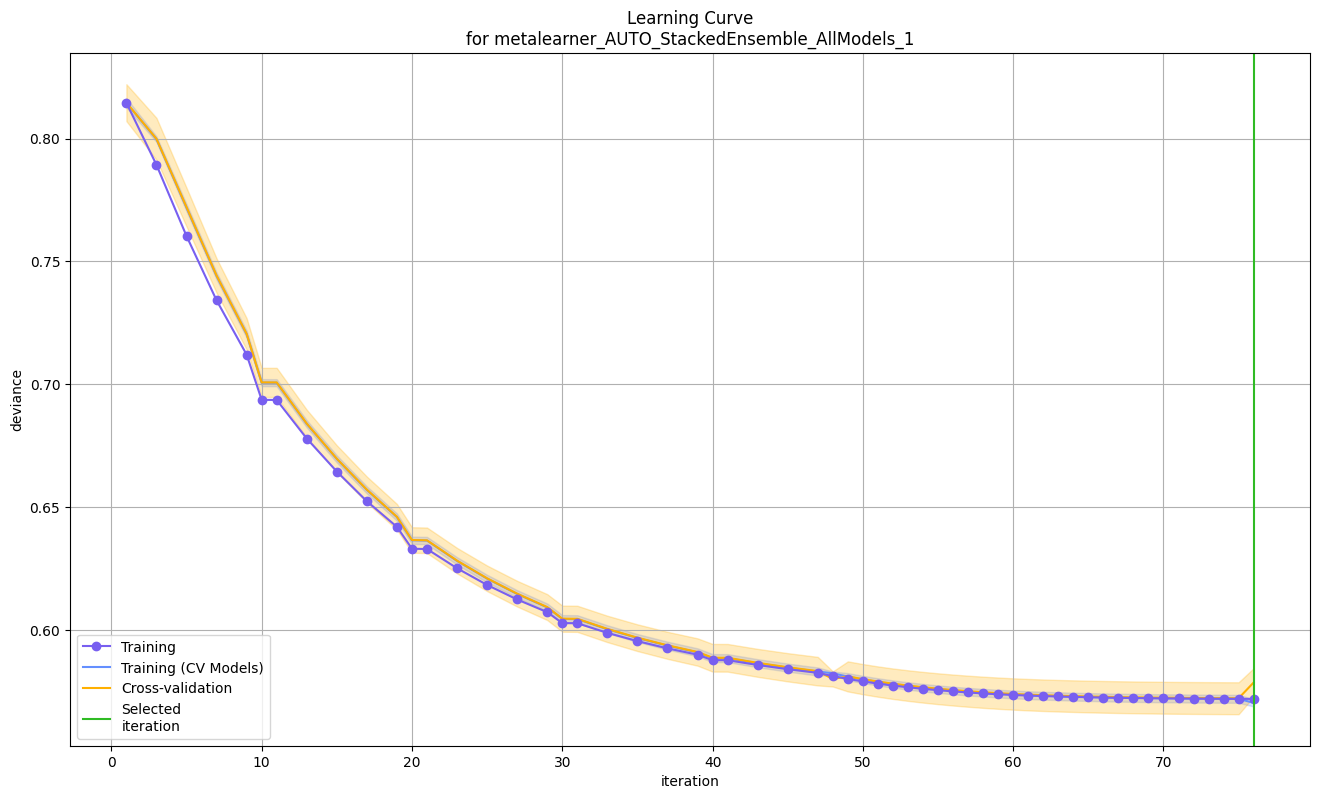

# Variable Importance

> The variable importance plot shows the relative importance of the most important variables in the model.

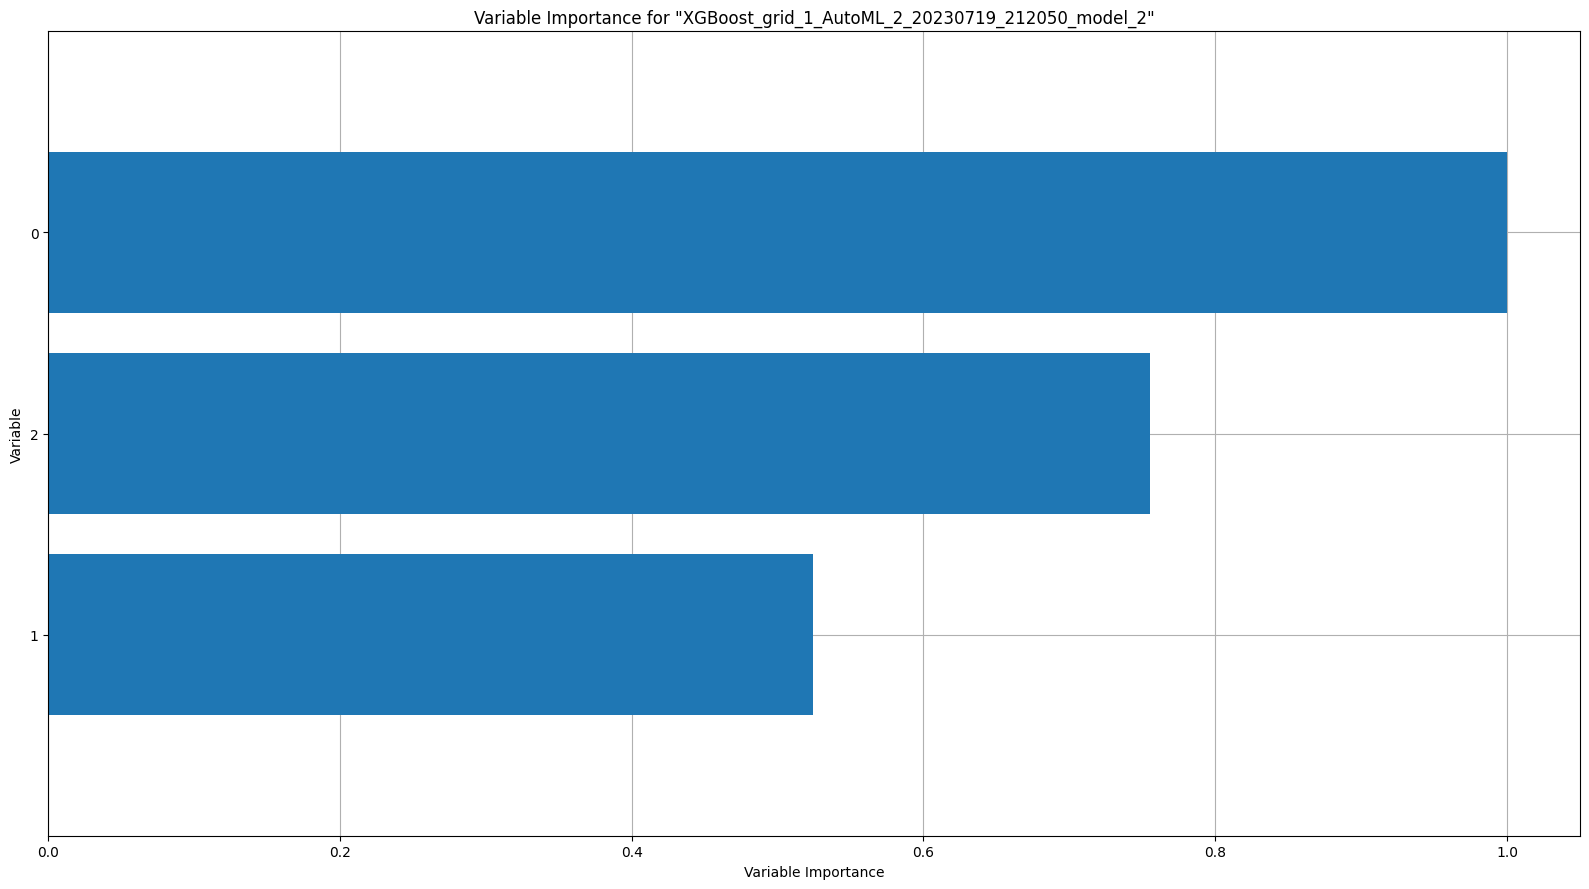

# Variable Importance Heatmap

> Variable importance heatmap shows variable importance across multiple models. Some models in H2O return variable importance for one-hot (binary indicator) encoded versions of categorical columns (e.g. Deep Learning, XGBoost). In order for the variable importance of categorical columns to be compared across all model types we compute a summarization of the the variable importance across all one-hot encoded features and return a single variable importance for the original categorical feature. By default, the models and variables are ordered by their similarity.

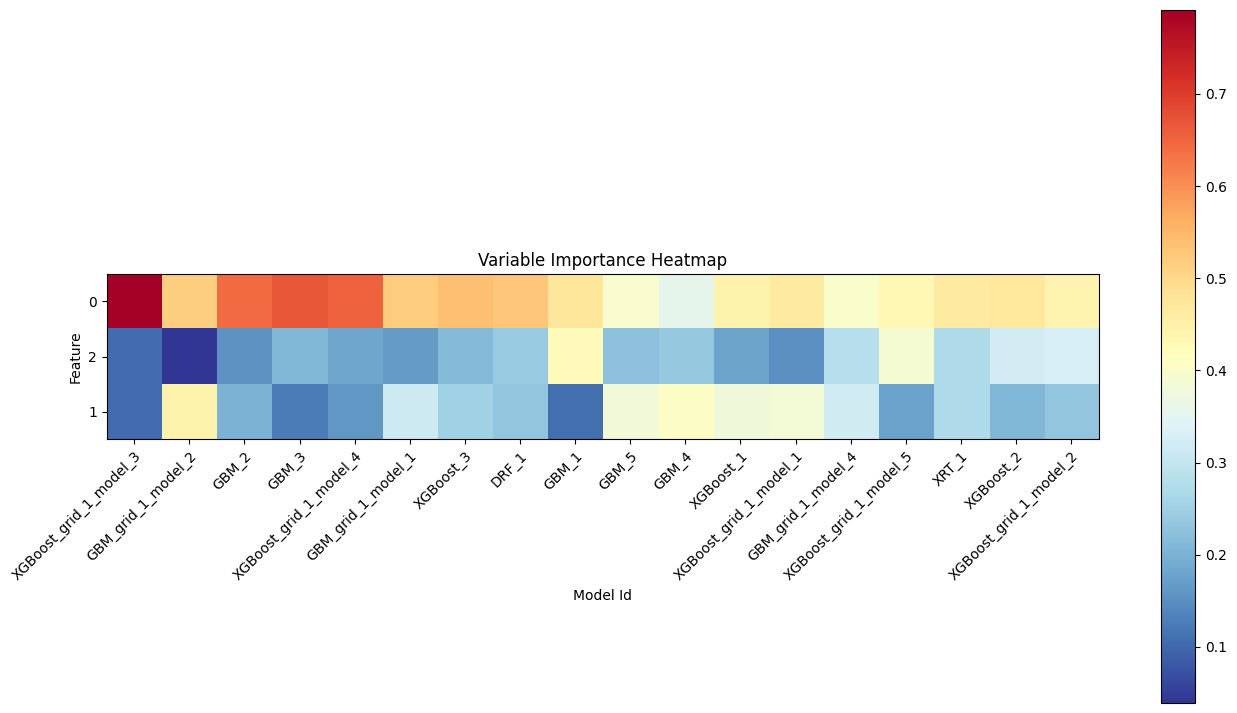

# Model Correlation

> This plot shows the correlation between the predictions of the models. For classification, frequency of identical predictions is used. By default, models are ordered by their similarity (as computed by hierarchical clustering). Interpretable models, such as GAM, GLM, and RuleFit are highlighted using red colored text.

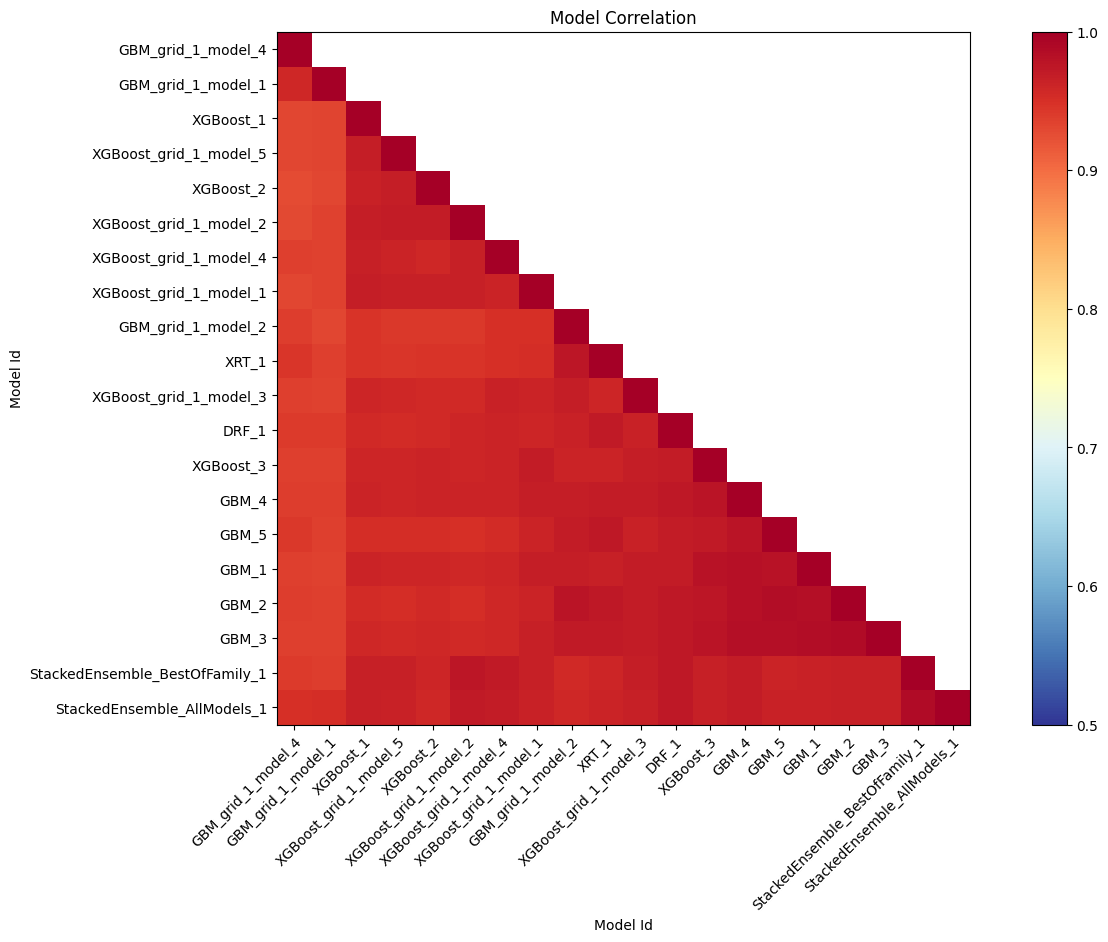

# SHAP Summary

> SHAP summary plot shows the contribution of the features for each instance (row of data). The sum of the feature contributions and the bias term is equal to the raw prediction of the model, i.e., prediction before applying inverse link function.

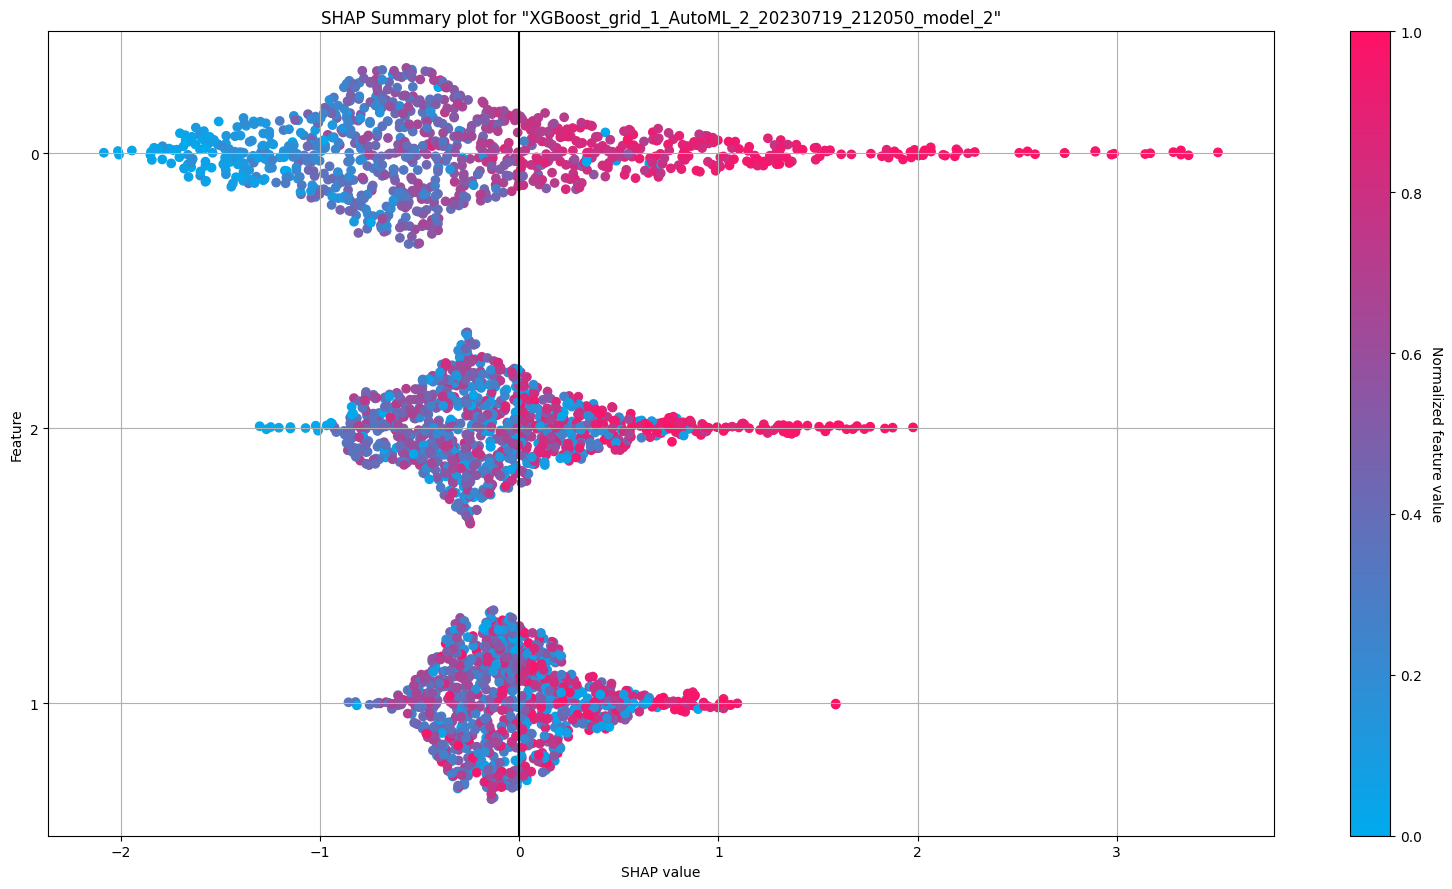

# Partial Dependence Plots

> Partial dependence plot (PDP) gives a graphical depiction of the marginal effect of a variable on the response. The effect of a variable is measured in change in the mean response. PDP assumes independence between the feature for which is the PDP computed and the rest.

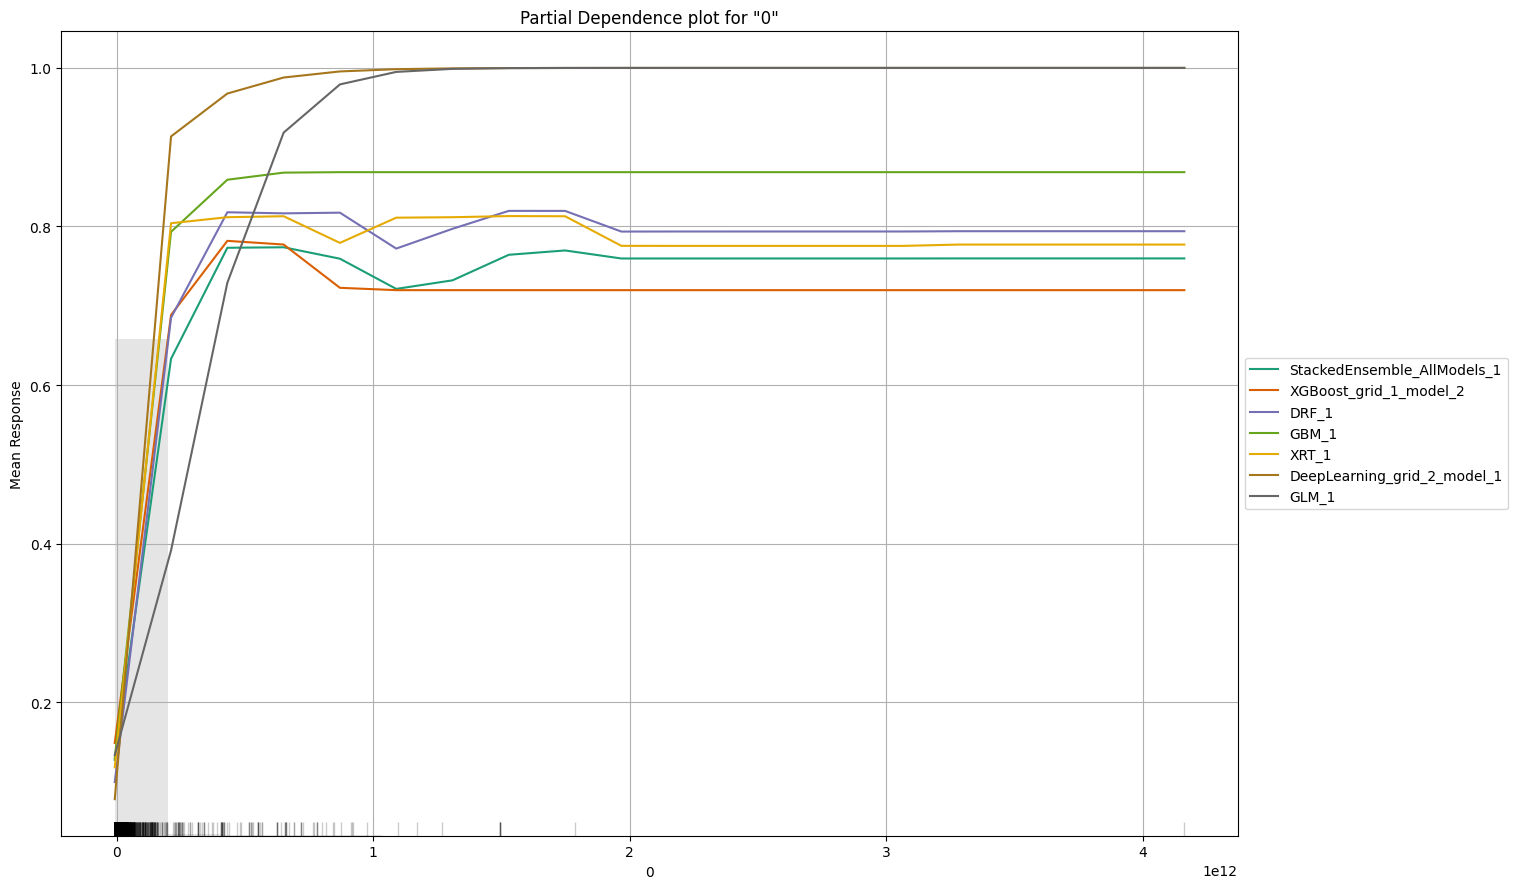

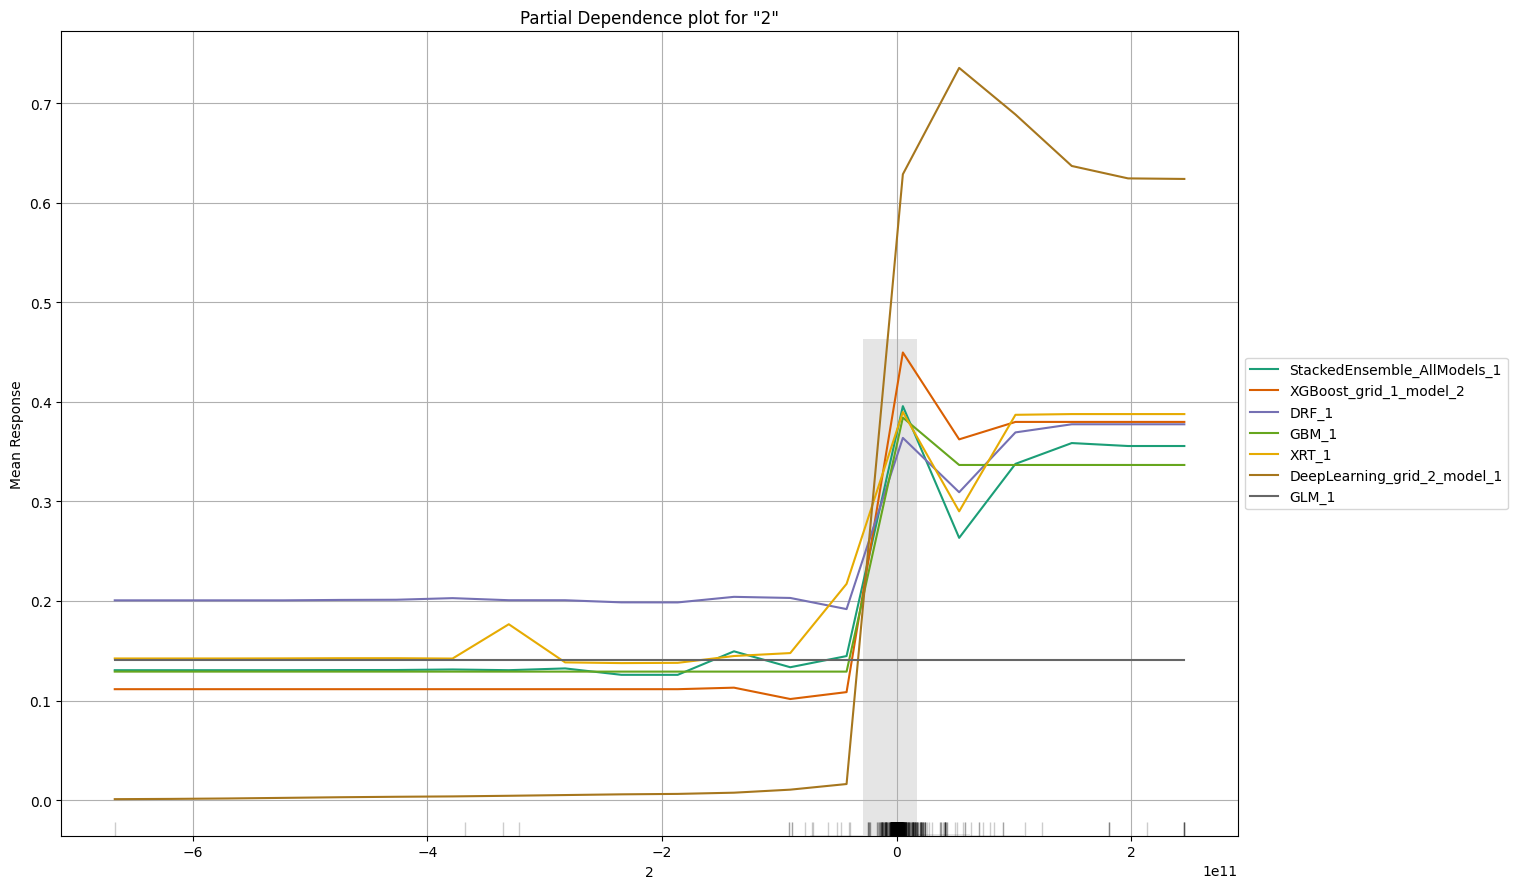

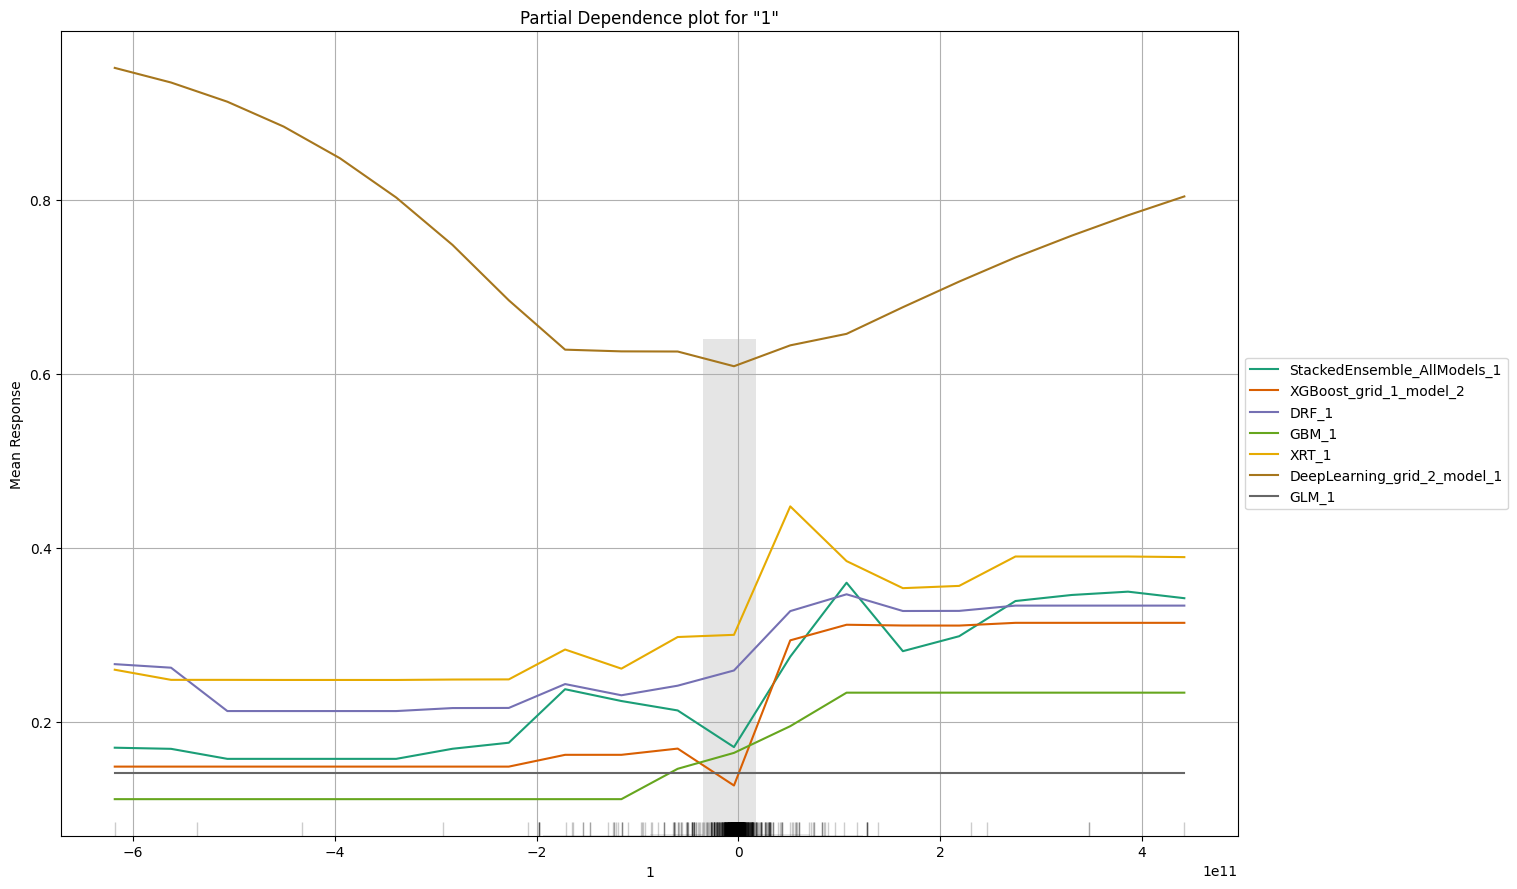

In [69]:
exa = aml.explain(test_h2o_pca)

### Para Correlación de Pearson

In [84]:
df_pearson = df_dummizado[['tender.enquiryPeriod.durationInDays','tender.numberOfTenderers','tender.tenderers.id q2','tender.tenderers.id q3','tender.enquiries porcentaje','tender.documents.documentTypeDetails_1','tender.documents.documentTypeDetails_2','tender.documents.documentTypeDetails_12','parties.details.legalEntityTypeDetail enquirer_3','parties.details.legalEntityTypeDetail supplier_3','parties.details.legalEntityTypeDetail tenderer_3','parties.roles tenderer q2','parties.roles tenderer q3','tender.procurementMethodDetails q1','tender.procurementMethodDetails q4','Tiempo de convocatoria LPN','tender.hasEnquiries_False','tender.hasEnquiries_True','has_complaint']]

In [89]:
train_pearson, test_pearson = train_test_split(df_pearson, test_size=0.2, random_state=42)

In [90]:
print(len(train_pearson))
print(len(test_pearson))

58041
14511


In [91]:
train_h2o_pearson = h2o.H2OFrame.from_python(train_pearson)
test_h2o_pearson = h2o.H2OFrame.from_python(test_pearson)

Parse progress: |████████████████████████████████████████████████████████████████| (done) 100%
Parse progress: |████████████████████████████████████████████████████████████████| (done) 100%


In [92]:
# Run AutoML for 20 base models
aml = H2OAutoML(max_models=25, seed=1)
aml.train(x=train_h2o_pearson.columns, y=y_col_name, training_frame=train_h2o_pearson)
# View the AutoML Leader
# board
lb = aml.leaderboard
lb.head(rows=lb.nrows)  # Print all rows instead of default (10 rows)

AutoML progress: |████████████████████████████████████████████████████████████

In [ ]:
aml.leader

In [ ]:
preds_pearson = aml.predict(test_h2o_pearson)

In [ ]:
preds_pearson['predict'] == 'True'
preds_pearson_True = preds_pearson[(preds_pearson['predict'] == 'True')]
preds_pearson_True.head(50)

In [ ]:
exa = aml.explain(test_h2o_pearson)